In [1]:
import os
import sys

In [2]:
pwd

'/home/andrew/Desktop/mimic'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline
import plotly
import plotly.express as px

In [4]:
# References
# https://github.com/MIT-LCP/mimic-workshop/blob/master/intro_to_mimic/01-example-patient-heart-failure.ipynb
# https://github.com/MIT-LCP/mimic-workshop
# https://github.com/MIT-LCP/mimic-code
# https://physionet.org/content/mimiciii-demo/1.4/
# https://github.com/YerevaNN/mimic3-benchmarks
# https://mimic.mit.edu/docs/iii/tables/

In [5]:
df_ad = pd.read_csv('mimic-iii-clinical-database-demo-1.4/ADMISSIONS.csv')

In [6]:
df_ad.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [7]:
df = pd.read_csv('mimic-iii-clinical-database-demo-1.4/D_CPT.csv')
df.head()

,row_id,category,sectionrange,sectionheader,subsectionrange,subsectionheader,codesuffix,mincodeinsubsection,maxcodeinsubsection
0,1,1,99201-99499,Evaluation and management,99201-99216,Office/other outpatient services,NaN,99201,99216
1,2,1,99201-99499,Evaluation and management,99217-99220,Hospital observation services,NaN,99217,99220
2,3,1,99201-99499,Evaluation and management,99221-99239,Hospital inpatient services,NaN,99221,99239
3,4,1,99201-99499,Evaluation and management,99241-99255,Consultations,NaN,99241,99255
4,5,1,99201-99499,Evaluation and management,99261-99263,Follow-up inpatient consultations (deleted codes),NaN,99261,99263


In [8]:
df_icd = pd.read_csv('mimic-iii-clinical-database-demo-1.4/DIAGNOSES_ICD.csv')
df_icd.head()

,row_id,subject_id,hadm_id,seq_num,icd9_code
0,112344,10006,142345,1,99591
1,112345,10006,142345,2,99662
2,112346,10006,142345,3,5672
3,112347,10006,142345,4,40391
4,112348,10006,142345,5,42731


In [9]:
df_pres = pd.read_csv('mimic-iii-clinical-database-demo-1.4/PRESCRIPTIONS.csv')
df_pres.head()

,row_id,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,formulary_drug_cd,gsn,ndc,prod_strength,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,route
0,32600,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Pneumococcal Vac Polyvalent,Pneumococcal Vac Polyvalent,PNEUMOcoccal Vac Polyvalent,PNEU25I,48548.0,6494300.0,25mcg/0.5mL Vial,0.5,mL,1,VIAL,IM
1,32601,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl,BISA5,2947.0,536338101.0,5 mg Tab,10,mg,2,TAB,PO
2,32602,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Bisacodyl,Bisacodyl,Bisacodyl (Rectal),BISA10R,2944.0,574705050.0,10mg Suppository,10,mg,1,SUPP,PR
3,32603,42458,159647,NaN,2146-07-21 00:00:00,2146-07-22 00:00:00,MAIN,Senna,Senna,Senna,SENN187,19964.0,904516561.0,1 Tablet,1,TAB,1,TAB,PO
4,32604,42458,159647,NaN,2146-07-21 00:00:00,2146-07-21 00:00:00,MAIN,Docusate Sodium (Liquid),Docusate Sodium (Liquid),Docusate Sodium (Liquid),DOCU100L,3017.0,121054410.0,100mg UD Cup,100,mg,1,UDCUP,PO


In [97]:
df_ce = pd.read_csv('mimic-iii-clinical-database-demo-1.4/CHARTEVENTS.csv')
df_ce.head()

/home/andrew/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning:

Columns (8,10,13,14) have mixed types.Specify dtype option on import or set low_memory=False.



,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
0,5279021,40124,126179,279554.0,223761,2130-02-04 04:00:00,2130-02-04 04:35:00,19085,95.9,95.9,?F,0.0,0.0,NaN,NaN
1,5279022,40124,126179,279554.0,224695,2130-02-04 04:25:00,2130-02-04 05:55:00,18999,2222221.7,2222221.7,cmH2O,0.0,0.0,NaN,NaN
2,5279023,40124,126179,279554.0,220210,2130-02-04 04:30:00,2130-02-04 04:43:00,21452,15.0,15.0,insp/min,0.0,0.0,NaN,NaN
3,5279024,40124,126179,279554.0,220045,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,94.0,94.0,bpm,0.0,0.0,NaN,NaN
4,5279025,40124,126179,279554.0,220179,2130-02-04 04:32:00,2130-02-04 04:43:00,21452,163.0,163.0,mmHg,0.0,0.0,NaN,NaN


In [99]:
# huge data, and have time series
len(df_ce)

758355

In [10]:
# Join 4 tables
# Admission
# Diagnostics
# Prescription
# Chart events

In [14]:
df_icd.describe();
df_ad.describe();
df_pres.describe();

In [15]:
# Explain of icd
df_icd_dict = pd.read_csv('mimic-iii-clinical-database-demo-1.4/D_ICD_DIAGNOSES.csv')
df_icd_dict.head()

,row_id,icd9_code,short_title,long_title
0,1,01716,Erythem nod tb-oth test,Erythema nodosum with hypersensitivity reactio...
1,2,01720,TB periph lymph-unspec,"Tuberculosis of peripheral lymph nodes, unspec..."
2,3,01721,TB periph lymph-no exam,"Tuberculosis of peripheral lymph nodes, bacter..."
3,4,01722,TB periph lymph-exam unk,"Tuberculosis of peripheral lymph nodes, bacter..."
4,5,01723,TB periph lymph-micro dx,"Tuberculosis of peripheral lymph nodes, tuberc..."


In [12]:
df_icd.icd9_code.describe()

count     1761
unique     581
top       4019
freq        53
Name: icd9_code, dtype: object

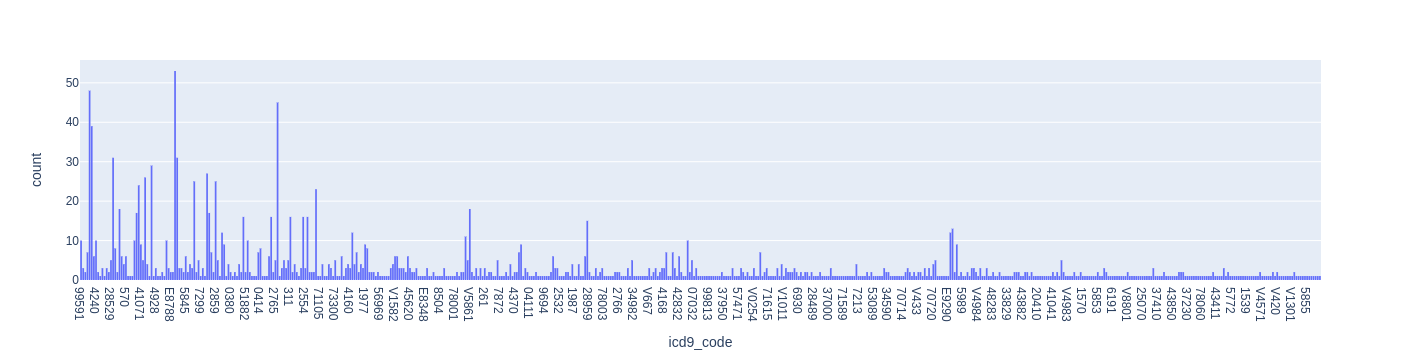

In [16]:
fig = px.histogram(df_icd, x="icd9_code")
fig.show()

In [27]:
# Choose the most frequent 20, on patient can be diagnosed with many disease
df_icd_sample = df_icd["icd9_code"]

In [70]:
# get top 20 most frequent names
n = 20
most_popular = df_icd_sample.value_counts()[:n].index.tolist()

In [72]:
most_popular;

In [39]:
# get patient with target code
df_target = pd.DataFrame()
for code in most_popular:
    df_test = df_icd[df_icd["icd9_code"] == code]
    df_target = df_target.append(df_test)

In [65]:
fig = px.histogram(df_target, x="icd9_code")
fig.show()

In [66]:
df_target.head()

,row_id,subject_id,hadm_id,seq_num,icd9_code
49,112457,10017,199207,14,4019
61,112469,10019,177759,12,4019
78,112520,10027,199395,8,4019
121,112578,10033,157235,7,4019
157,112623,10038,111115,13,4019


In [63]:
# all records
len(df_target.subject_id)

544

In [67]:
# unique patient
len(df_target.subject_id.unique())

92

In [68]:
# one person 
df_target[df_target['subject_id'] == 10017]

,row_id,subject_id,hadm_id,seq_num,icd9_code
49,112457,10017,199207,14,4019
45,112453,10017,199207,10,25000
48,112456,10017,199207,13,2724
43,112451,10017,199207,8,486


In [69]:
# another person
df_target[df_target['subject_id'] == 10038]

,row_id,subject_id,hadm_id,seq_num,icd9_code
157,112623,10038,111115,13,4019
147,112613,10038,111115,3,42731
149,112615,10038,111115,5,5849
148,112614,10038,111115,4,4280


In [90]:
# Join with df_ad where patient and hospital ID are the same
# This will remove some important info
df_merged = pd.merge(df_target, df_ad, how = 'left', on = 'subject_id')
len(df_merged)

2427

In [91]:
df_merged.head()

,row_id_x,subject_id,hadm_id_x,seq_num,icd9_code,row_id_y,hadm_id_y,admittime,dischtime,deathtime,...,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,112457,10017,199207,14,4019,12269,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,...,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
1,112469,10019,177759,12,4019,12270,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,...,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1
2,112520,10027,199395,8,4019,12278,199395,2190-07-13 07:15:00,2190-07-25 14:00:00,NaN,...,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,MITRAL REGURGITATION;CORONARY ARTERY DISEASE\...,0,1
3,112578,10033,157235,7,4019,12283,157235,2132-12-05 02:46:00,2132-12-08 15:15:00,NaN,...,Medicare,POLI,CATHOLIC,MARRIED,WHITE,2132-12-04 20:11:00,2132-12-05 04:05:00,RENAL FAILIURE-SYNCOPE-HYPERKALEMIA,0,1
4,112623,10038,111115,13,4019,12288,111115,2144-02-09 17:53:00,2144-02-21 13:30:00,NaN,...,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2144-02-09 13:35:00,2144-02-09 20:12:00,FAILURE TO THRIVE,0,1


In [75]:
df_merged[df_merged.subject_id == 10017]

,row_id_x,subject_id,hadm_id_x,seq_num,icd9_code,row_id_y,hadm_id_y,admittime,dischtime,deathtime,...,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,112457,10017,199207,14,4019,12269,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,...,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
723,112453,10017,199207,10,25000,12269,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,...,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
872,112456,10017,199207,13,2724,12269,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,...,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
1181,112451,10017,199207,8,486,12269,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,...,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1


In [77]:
df_merged[df_merged.subject_id == 10038]

,row_id_x,subject_id,hadm_id_x,seq_num,icd9_code,row_id_y,hadm_id_y,admittime,dischtime,deathtime,...,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
4,112623,10038,111115,13,4019,12288,111115,2144-02-09 17:53:00,2144-02-21 13:30:00,NaN,...,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2144-02-09 13:35:00,2144-02-09 20:12:00,FAILURE TO THRIVE,0,1
257,112613,10038,111115,3,42731,12288,111115,2144-02-09 17:53:00,2144-02-21 13:30:00,NaN,...,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2144-02-09 13:35:00,2144-02-09 20:12:00,FAILURE TO THRIVE,0,1
478,112615,10038,111115,5,5849,12288,111115,2144-02-09 17:53:00,2144-02-21 13:30:00,NaN,...,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2144-02-09 13:35:00,2144-02-09 20:12:00,FAILURE TO THRIVE,0,1
675,112614,10038,111115,4,4280,12288,111115,2144-02-09 17:53:00,2144-02-21 13:30:00,NaN,...,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2144-02-09 13:35:00,2144-02-09 20:12:00,FAILURE TO THRIVE,0,1


In [95]:
df_merged.diagnosis.unique()[:10]

array(['HUMERAL FRACTURE', 'ALCOHOLIC HEPATITIS',
       ' MITRAL REGURGITATION;CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH MVR  ? MITRAL VALVE REPLACEMENT /SDA',
       'RENAL FAILIURE-SYNCOPE-HYPERKALEMIA', 'FAILURE TO THRIVE',
       'METASTATIC MELANOMA;BRAIN METASTASIS', 'FEVER', 'VARICEAL BLEED',
       'LOWER GI BLEED', 'ESOPHAGEAL CANCER/SDA'], dtype=object)

In [102]:
# Explore chart event
# Check progress of one patient 
df_ce[df_ce.subject_id == 10017]

,row_id,subject_id,hadm_id,icustay_id,itemid,charttime,storetime,cgid,value,valuenum,valueuom,warning,error,resultstatus,stopped
112705,85819546,10017,199207,204881.0,27,2149-05-29 18:00:00,2149-05-29 18:24:00,15218,Obese,NaN,NaN,NaN,NaN,NaN,NotStopd
112706,85819547,10017,199207,204881.0,31,2149-05-29 18:00:00,2149-05-29 18:24:00,15218,Bedrest,NaN,NaN,NaN,NaN,NaN,NotStopd
112707,85819548,10017,199207,204881.0,77,2149-05-29 18:00:00,2149-05-29 18:05:00,19525,Inappropriate,NaN,NaN,NaN,NaN,NaN,NotStopd
112708,85819549,10017,199207,204881.0,80,2149-05-29 18:00:00,2149-05-29 18:24:00,15218,Present,NaN,NaN,NaN,NaN,NaN,NotStopd
112709,85819550,10017,199207,204881.0,82,2149-05-29 18:00:00,2149-05-29 22:07:00,15218,Bedfast,NaN,NaN,NaN,NaN,NaN,NotStopd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426903,235315839,10017,199207,204881.0,8441,2149-05-31 20:00:00,2149-05-31 19:39:00,16870,42,42.0,mmHg,NaN,NaN,NaN,NotStopd
426904,235315840,10017,199207,204881.0,8549,2149-05-31 20:00:00,2149-05-31 19:39:00,16870,120,120.0,BPM,NaN,NaN,NaN,NotStopd
426905,235315841,10017,199207,204881.0,8551,2149-05-31 20:00:00,2149-05-31 19:39:00,16870,160,160.0,mmHg,NaN,NaN,NaN,NotStopd
426906,235315842,10017,199207,204881.0,8553,2149-05-31 20:00:00,2149-05-31 19:39:00,16870,30,30.0,BPM,NaN,NaN,NaN,NotStopd


In [64]:
# PROCESSING PIPELINE

import string # used for preprocessing
import re # used for preprocessing
import nltk # the Natural Language Toolkit, used for preprocessing
import numpy as np # used for managing NaNs
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords # used for preprocessing
from nltk.stem import WordNetLemmatizer # used for preprocessing
nltk.download('stopwords')
nltk.download('wordnet')

# Ref
# https://github.com/bvanaken/clinical-outcome-prediction

[nltk_data] Downloading package stopwords to /home/andrew/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/andrew/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [1]:
# Create a pipeline for text processing and apply it to our dataset.
# 
# First, we need to create a transformer (or a pipeline of transformers) which converts raw text to a vector of numbers.
# 
# In our case, we will use a built-in transformer: [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).
# 
# We also need to preprocess raw text data.
# 
# For this example we will use a very simple approach: removing punctuation and converting all words to lowercase. We will do this using a custom function. It will be applied to each review separately.
# 
# _Note: we will do this for demonstration purposes. There are better, built-in ways to do this in scikit-learn that are out of scope for this course._
import string

In [50]:
f = open("sample_record.txt", "r")
text = f.readlines()
print("number of docs: ", len(text))
print("".join(text))
f.close()

number of docs:  3
A random record of a patient.
Bla, bla, bla, and bla.
This is a a a a I don't know


In [51]:
# clean text
def clean_text(text):
    text = re.sub(r'\d+', '', text)
    result = re.sub(r"[^A-Za-z(),!?\'\`]", " ", text)
    return result

In [52]:
# make all text lowercase
def text_lowercase(text):
    return text.lower()

In [53]:
# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [54]:
# tokenize
def tokenize(text):
    text = word_tokenize(text)
    return text

In [55]:
# remove stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

In [56]:
# lemmatize
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

In [57]:
def preprocessing(text):
    text = clean_text(text)
    text = text_lowercase(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [67]:
clean_data = []
for t in text:
    clean_t = preprocessing(t)
    clean_data.append(clean_t)
clean_text = "\n".join(clean_data)
print(clean_text)

random record patient
bla bla bla bla
dont know


In [ ]:
# May be add another step for grammar correcttion? 

In [61]:
# Now we can use it in a pipeline:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(preprocessor=preprocessing, stop_words={'english'})

In [62]:
x_train = text
y_train = 'x'

In [65]:
# To convert a whole dataset, we can use [fit_transform](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform) method.
# 
# This will convert a dataset of text documents to a matrix of token counts.
# 
# We can specify several parameters:
# - **analyzer** - whether to use a word or character n-grams
# - **ngram_range** - range of n-gram sizes
# - **stop_words** - whether to filter stop words
# - **max_features** - maximum number of features to extract
# 
# Let's see the result:
x_train_transformed = vectorizer.fit_transform(x_train)
x_train_transformed

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [66]:
# The result is a sparse matrix.
# 
# To convert it to dense matrix, we can use [toarray()](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.asarray.html).
# 
# To see what was extracted, we can use [get_feature_names()](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.get_feature_names).
x_train_transformed.toarray()
vectorizer.get_feature_names()

['bla', 'dont', 'know', 'patient', 'random', 'record']

In [68]:
x_train_transformed.toarray()

array([[0, 0, 0, 1, 1, 1],
       [4, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0]])

In [25]:
# Now we can use it in a classifier.
# 
# Let's use multinomial Naive Bayes again.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

clf = MultinomialNB()
clf.fit(x_train_transformed, y_train)

ValueError: bad input shape ()

In [26]:
# Let's apply the model to the test set and see how well it performs.
x_test_transformed = vectorizer.transform(x_test)

y_pred = clf.predict(x_test_transformed)
print(classification_report(y_test, y_pred))

NameError: name 'x_test' is not defined

In [ ]:
# Let's try a different classifier.
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
print(classification_report(y_test, y_pred))

# Let's try one more classifier.
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
print(classification_report(y_test, y_pred))